# Activity: Explore sampling

## Introduction
In this activity, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with extremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work. 

For this activity, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this activity includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset. 

## Step 1: Imports

### Import packages

Import `pandas`,  `numpy`, `matplotlib`, `statsmodels`, and `scipy`. 

In [1]:
# Import libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

### Load the dataset

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

epa_data = pd.read_csv("c4_epa_air_quality.csv", index_col = 0)

<details>
  <summary><h4>Hint 1</h4></summary>

Use the function in the `pandas` library that allows you to read in data from a csv file and load it into a DataFrame. 

</details>

<details>
  <summary><h4>Hint 2</h4></summary>

Use the `read_csv` function from the pandas `library`. Set the `index_col` parameter to `0` to read in the first column as an index (and to avoid `"Unnamed: 0"` appearing as a column in the resulting Dataframe).

</details>

## Step 2: Data exploration

### Examine the data

To understand how the dataset is structured, examine the first 10 rows of the data.

In [3]:
# First 10 rows of the data

epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame. 

</details>

<details>
  <summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `head` function from the `pandas` library. Set the `n` parameter to `10` to print out the first 10 rows.

</details>

**Question:** What does the `aqi` column represent?

- The `aqi` column represents the Air Quality Index.

### Generate a table of descriptive statistics

Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.

In [4]:
epa_data.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


<details>
  <summary><h4>Hint 1</h4></summary>

Use function in the `pandas` library that allows you to generate a table of basic descriptive statistics in a DataFrame.

</details>

<details>
  <summary><h4>Hint 2</h4></summary>

Use the `describe` function from the `pandas` library. Set the `include` parameter passed in to this function to 'all' to specify that all columns of the input be included in the output.

</details>

**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

- The value is `6.757692`. This value will be compared to the mean value after sampling with replacement later in the notebook.

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

- The count value for the `aqi` column is 260. This means there are 260 AQI measurements represented in this dataset.

### Use the `mean()` function on the `aqi`  column

Now, use the `mean()` function on the `aqi`  column and assign the value to a variable `population_mean`. The value should be the same as the one generated by the `describe()` method in the above table. 

In [5]:
population_mean = epa_data['aqi'].mean()
population_mean

6.757692307692308

<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the function in the `pandas` library that allows you to generate a mean value for a column in a DataFrame.

</details>

<details>
  <summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `mean()` method.

</details>

## Step 3: Statistical tests

### Sample with replacement

First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed. Make that arbitrary number `42`.

In [6]:
sampled_data = epa_data.sample(n=50, replace=True, random_state=42)

### Output the first 10 rows

Output the first 10 rows of the DataFrame. 

In [7]:
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame. 

</details>

<details>
  <summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `head` function from the `pandas` library. Set the `n` parameter to `10` to print out the first 10 rows.

</details>

**Question:** In the DataFrame output, why is the row index 102 repeated twice? 

- Sampling with replacement is random, allowing sampling units to occur more than once. Row index 102 just happened to be sampled more than once.

**Question:** What does `random_state` do?

- The parameter allows for the reproduction of the same exact sample (i.e., the same set of numbers). This means that the same rows in the dataset will be sampled with replacement each time the command is run. 

### Compute the mean value from the `aqi` column

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [8]:
sample_mean = sampled_data['aqi'].mean()
sample_mean

5.54

 **Question:**  Why is `sample_mean` different from `population_mean`?


- Due to sampling variability, the sample mean (`sample_mean`) is usually not the same as the population mean (`population_mean`). In this case, the sample mean is a point estimate of the population mean based on a random sample of 50 AQI values rather than the 260 AQI values from the original population in `epa_data`.  

### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.


In [9]:
estimate_list = []
for i in range(10000):
    estimate_list.append(epa_data['aqi'].sample(n=50,replace=True).mean())

print('Count of Values:', len(estimate_list))
print('First 10 Values:', estimate_list[:10])

Count of Values: 10000
First 10 Values: [5.24, 5.92, 6.4, 8.02, 9.16, 6.86, 8.0, 6.8, 6.28, 7.84]


<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Review [the content about sampling in Python](https://www.coursera.org/learn/the-power-of-statistics/lecture/SNOE0/sampling-distributions-with-python). 

</details>

### Create a new DataFrame

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [10]:
estimate_df = pd.DataFrame(data={'estimate': estimate_list})
estimate_df

,estimate
0,5.24
1,5.92
2,6.40
3,8.02
4,9.16
...,...
9995,7.46
9996,8.00
9997,6.84
9998,7.36


<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Review [the content about sampling in Python](https://www.coursera.org/learn/the-power-of-statistics/lecture/SNOE0/sampling-distributions-with-python). 

</details>

<details>
<summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `mean()` function.

</details>

### Compute the mean() of the sampling distribution

Next, compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [11]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

6.751832000000013

<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the function in the `pandas` library that allows you to generate a mean value for a column in a DataFrame.

</details>

<details>
  <summary><h4><strong> Hint 2 </STRONG></h4></summary>

Use the `mean()` function.

</details>

**Question:** What is the mean for the sampling distribution of 10,000 random samples?

- The mean for the sampling distribution is 6.75. If we rerun the code, this number will vary as `random_state` was not set to a value.

<details>
  <summary><h4><strong> Hint 3 </STRONG></h4></summary>

This value is contained in `mean_sample_means`.

</details>

<details>
  <summary><h4><strong> Hint 4 </STRONG></h4></summary>

According to the central limit theorem, the mean of the preceding sampling distribution should be roughly equal to the population mean. 

</details>

**Question:** How are the central limit theorem and random sampling (with replacement) related?

- Random sampling with replacement is related to the central limit theorem because it means you are drawing observations independently from a population. The central limit theorem states that if a sample size is large enough and the observations are drawn independently—or with replacement—the sampling distribution of the sample mean is approximately the normal distribution. Furthermore, the mean parameter is the population mean and the standard deviation parameter is the standard error. 

### Output the distribution using a histogram

Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.

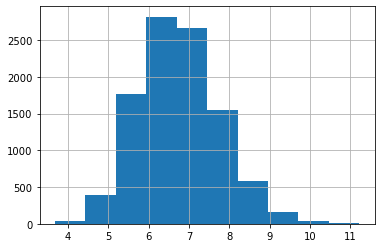

In [ ]:
estimate_df['estimate'].hist()

<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the `hist()` function. 

</details>

### Calculate the standard error

Calculate the standard error of the mean AQI using the initial sample of 50. The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [13]:
standard_error = sampled_data['aqi'].std() / np.sqrt(len(sampled_data))
standard_error

0.7413225908290327

<details>
  <summary><h4><strong> Hint 1 </STRONG></h4></summary>

Use the `std()` function and the `np.sqrt()` function.

</details>

## Step 4: Results and evaluation

###  Visualize the relationship between the sampling and normal distributions

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution.

1. Plot a histogram of the 10,000 sample means 
2. Add a vertical line indicating the mean of the first single sample of 50
3. Add another vertical line indicating the mean of the means of the 10,000 samples 
4. Add a third vertical line indicating the mean of the actual population

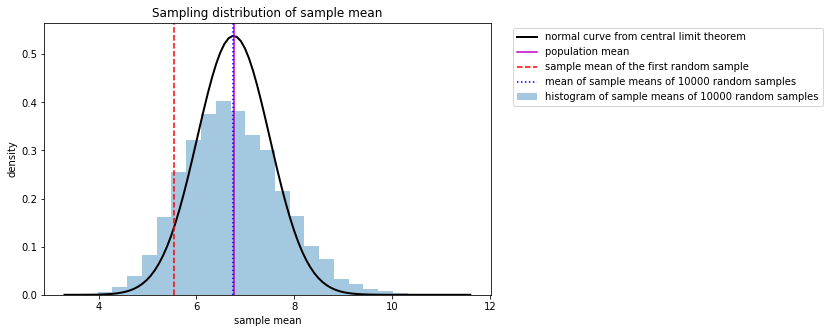

In [14]:
# Generate a grid of 100 values from xmin to xmax.

plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, population_mean, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1));

**Question:** What insights did you gain from the preceding sampling distribution?

1.  The histogram of the sampling distribution is well-approximated by the normal distribution described by the central limit theorem.
2.  The estimate based on one particular sample (red dashed line) is off-center. This is expected due to sampling variability. The red dashed line would be in a different location if `epa_data.sample(n=50, replace=True, random_state=42)` had a different value for `random_state`.
3.  The population mean (green solid line) and the mean of the sample means (blue dotted line) overlap, meaning that they are essentially equal to each other.

# Considerations

**What are some key takeaways that you learned from this lab?**
- Sampling with replacement on a dataset leads to duplicate rows.
- Sample means are different from population means due to sampling variability.
- The central limit theorem helps describe the sampling distribution of the sample mean for many different types of datasets.


**What findings would you share with others?**
- The mean AQI in a sample of 50 observations was below 100 in a statistically significant sense (at least 2–3 standard errors away). For reference, AQI values at or below 100 are generally thought of as satisfactory.
- This notebook didn't examine values outside the "satisfactory" range so analysis should be done to investigate unhealthy AQI values.

**What would you convey to external stakeholders?**
- Carbon monoxide levels are satisfactory in general.  
- Funding should be allocated to further investigate regions with unhealthy levels of carbon monoxide and improve the conditions in those regions.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.